In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('C:/Users/chill/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/chill/Downloads/test.csv')
gender_submission_df = pd.read_csv('C:/Users/chill/Downloads/gender_submission.csv')


In [2]:
# Select relevant features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
train_df = train_df[selected_features + ['Survived']]
test_df = test_df[selected_features]

# Fill missing values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Convert categorical variables into numerical representations
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [4]:
def naive_bayes(train, y_train, test):
    # Calculate class probabilities
    num_samples, num_features = train.shape
    class_probs = {}
    for label in np.unique(y_train):
        label_samples = train[y_train == label]
        class_probs[label] = len(label_samples) / num_samples

    # Calculate feature probabilities
    feature_probs = {}
    for feature_idx in range(num_features):
        feature_probs[feature_idx] = {}
        for feature_value in np.unique(train[:, feature_idx]):
            feature_probs[feature_idx][feature_value] = {}
            for label in np.unique(y_train):
                label_samples = train[y_train == label]
                feature_count = np.sum(label_samples[:, feature_idx] == feature_value)
                total_count = len(label_samples)
                feature_probs[feature_idx][feature_value][label] = feature_count / total_count

    # Predict the labels for test samples
    predictions = []
    for sample in test:
        probs = {}
        for label in np.unique(y_train):
            probs[label] = class_probs[label]
            for feature_idx in range(num_features):
                feature_value = sample[feature_idx]
                if feature_value in feature_probs[feature_idx]:
                    probs[label] *= feature_probs[feature_idx][feature_value][label]
                else:
                    probs[label] *= 0  # Assign default probability of 0 for missing feature values
        predicted_label = max(probs, key=probs.get)
        predictions.append(predicted_label)

    return predictions


In [5]:
nb_predictions = naive_bayes(X_train, y_train, X_test)


In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(train, y_train, test, k):
    predictions = []
    for test_sample in test:
        distances = []
        for i, train_sample in enumerate(train):
            distance = euclidean_distance(test_sample, train_sample)
            distances.append((distance, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        labels = [sample[1] for sample in k_nearest]
        predicted_label = max(set(labels), key=labels.count)
        predictions.append(predicted_label)
    return predictions

# Apply KNN algorithm
k = 5  # Number of nearest neighbors
knn_predictions = knn(X_train, y_train, X_test, k)


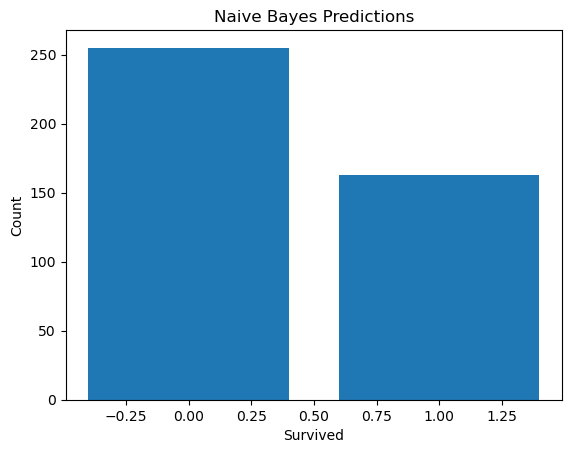

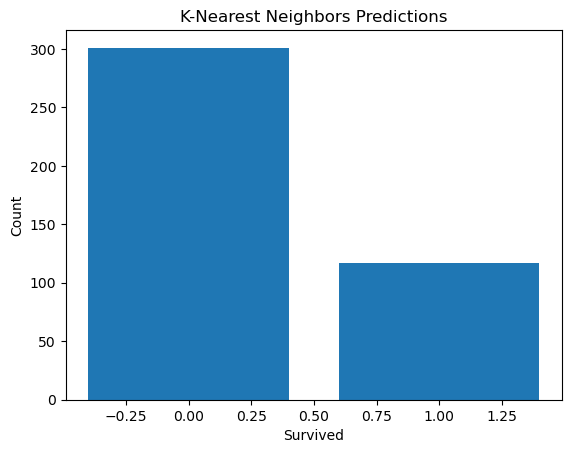

In [7]:
# Visualize the predictions
def plot_predictions(predictions, title):
    unique_labels, label_counts = np.unique(predictions, return_counts=True)
    plt.bar(unique_labels, label_counts)
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Plot Naive Bayes predictions
plot_predictions(nb_predictions, 'Naive Bayes Predictions')

# Plot KNN predictions
plot_predictions(knn_predictions, 'K-Nearest Neighbors Predictions')


In [8]:
ground_truth = gender_submission_df['Survived'].values
nb_accuracy = np.mean(nb_predictions == ground_truth)
knn_accuracy = np.mean(knn_predictions == ground_truth)

print('Naive Bayes Accuracy:', nb_accuracy)
print('KNN Accuracy:', knn_accuracy)


Naive Bayes Accuracy: 0.8397129186602871
KNN Accuracy: 0.7488038277511961
